# NBACK_CLASSIFICATION BRANCH 
- 2-back classify same(1) or different(2). 
- 2 stimuli, 30 trials per episode
    - NB more than 2 stimuli makes "different" more likely. this might introduce a bias when numstim>2

In [1]:
from glob import glob as glob
import numpy as np
from nmback import *

from datetime import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

%load_ext autoreload
%reload_ext autoreload
%autoreload 2

/Users/abeukers/anaconda/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


## task

In [2]:
ML = MetaLearner(stsize=20,nstim=3,edim=50)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
dropout in and out
Instructions for updating:
Use tf.cast instead.


In [3]:
trainer = Trainer(ML,nback=2,mback=2)

In [4]:
tr_acc,k_arr = trainer.train_close_loop(10000,thresh=.99)

0.0 0.32 k= 0
0.05 0.9 k= 1
0.1 0.8 k= 12
0.15 0.76 k= 32
0.2 0.98 k= 54
0.25 0.96 k= 80
0.3 0.94 k= 120
0.35 0.86 k= 173
0.4 0.94 k= 232
0.45 1.0 k= 299
0.5 0.94 k= 368
0.55 0.98 k= 445
0.6 1.0 k= 518
0.65 1.0 k= 596
0.7 0.94 k= 680
0.75 0.98 k= 764
0.8 1.0 k= 856
0.85 0.92 k= 943
0.9 0.88 k= 1037
0.95 1.0 k= 1140


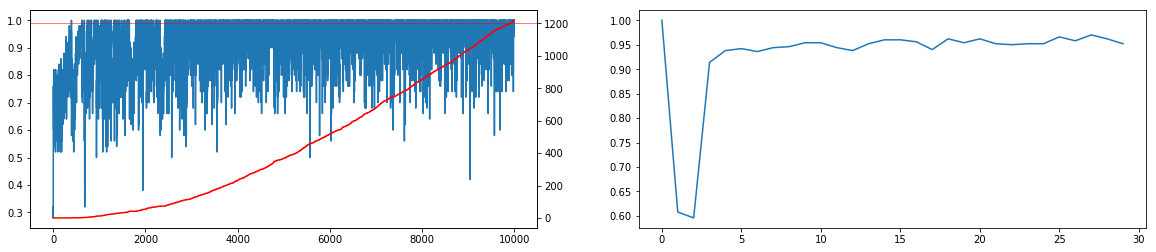

In [5]:
fig,axarr=plt.subplots(1,2,figsize=(20,4))
ax = axarr[0]
ax.plot(tr_acc)
ax.axhline(.99,c='r',lw=.5)
ax.twinx().plot(k_arr,c='r')
ax = axarr[1]
eval_acc = trainer.eval_loop(500,30,0)
ax.plot(eval_acc.mean(0))

In [9]:
# ML.reinitialize()

tr_acc=trainer.train_loop(6000,300)
plt.plot(tr_acc)

randomizing params
0.0 0.74
0.05 0.78


KeyboardInterrupt: 

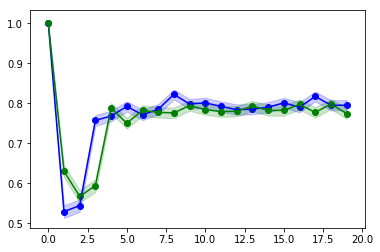

In [313]:
tpe = 20
ne = 1000
trainer = Trainer(ML,nback=2,mback=3)

for task_flag in range(2):
  c = ['blue','green'][task_flag]
  eval_acc = trainer.eval_loop(ne,tpe,task_flag)
  M = eval_acc.mean(0)
  S = eval_acc.std(0)/np.sqrt(ne)
  plt.plot(M,c=c)
  plt.fill_between(range(tpe),M-S,M+S,alpha=.2,color=c)
  plt.scatter(range(tpe),M,c=c)



## save eval data at multiple points during training

In [350]:
ML = MetaLearner(stsize=30)
trainer = Trainer(ML,nback=2,mback=3)

train_nsess = 20
train_eps = 500

eval_ne = 1000
eval_tpe = 20

for sess in range(train_nsess):
  trainer.train_loop(train_eps,train_eps)
  eval_acc2 = trainer.eval_loop(eval_ne,eval_tpe,0)
  eval_acc3 = trainer.eval_loop(eval_ne,eval_tpe,1)
  np.save('model_data/LSTM30-23back-train_eps_%i-eval_2back-sess%i'%(train_eps,sess),eval_acc2)
  np.save('model_data/LSTM30-23back-train_eps_%i-eval_3back-sess%i'%(train_eps,sess),eval_acc3)

0.0 0.7
0.05 0.7
0.1 0.68
0.15 0.7
0.2 0.74
0.25 0.72
0.3 0.7
0.35 0.8
0.4 0.8
0.45 0.86
0.5 0.78
0.55 0.84
0.6 0.66
0.65 0.88
0.7 0.9
0.75 0.6
0.8 0.62
0.85 0.74
0.9 0.72
0.95 0.76
0.0 0.72
0.05 0.64
0.1 0.76
0.15 0.64
0.2 0.78
0.25 0.8
0.3 0.8
0.35 0.92
0.4 0.78
0.45 0.88
0.5 0.76
0.55 0.9
0.6 0.78
0.65 0.84
0.7 0.66
0.75 0.94
0.8 0.74
0.85 0.76
0.9 0.72
0.95 0.86
0.0 0.76
0.05 0.74
0.1 0.78
0.15 0.76
0.2 0.8
0.25 0.82
0.3 0.74
0.35 0.76
0.4 0.68
0.45 0.84
0.5 0.98
0.55 0.72
0.6 0.9
0.65 0.98
0.7 0.98
0.75 0.98
0.8 0.98
0.85 0.98
0.9 0.98
0.95 0.98
0.0 0.72
0.05 0.76
0.1 0.98
0.15 0.98
0.2 1.0
0.25 0.98
0.3 0.96
0.35 0.98
0.4 0.96
0.45 1.0
0.5 1.0
0.55 0.98
0.6 0.98
0.65 1.0
0.7 0.98
0.75 0.98
0.8 1.0
0.85 0.98
0.9 1.0
0.95 0.96
0.0 0.78
0.05 1.0
0.1 0.98
0.15 0.98
0.2 0.98
0.25 1.0
0.3 0.96
0.35 1.0
0.4 0.96
0.45 0.96
0.5 1.0
0.55 0.98
0.6 0.96
0.65 1.0
0.7 0.98
0.75 0.98
0.8 1.0
0.85 0.98
0.9 0.96
0.95 0.98
0.0 0.88
0.05 1.0
0.1 0.98
0.15 0.98
0.2 1.0
0.25 0.98
0.3 0.98
0.35 0.96
0

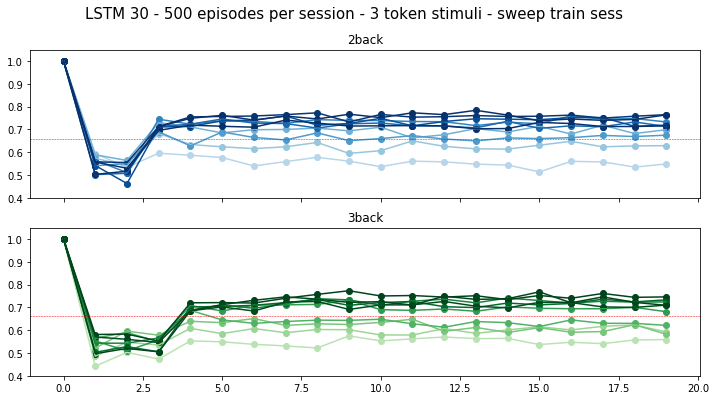

In [349]:
fig,axarr = plt.subplots(2,1,figsize=(12,6),sharex=True);axarr=axarr.reshape(-1)
for sess in range(10):
  eval_data2 = np.load("model_data/LSTM30-23back-train_eps_500-eval_2back-sess%i.npy"%(sess))
  eval_data3 = np.load("model_data/LSTM30-23back-train_eps_500-eval_3back-sess%i.npy"%(sess))
  M2 = eval_data2.mean(0)
  M3 = eval_data3.mean(0)
  axarr[0].plot(M2,c=plt.get_cmap('Blues')((sess+3)*25))
  axarr[1].plot(M3,c=plt.get_cmap('Greens')((sess+3)*25))
  axarr[0].scatter(range(20),M2,c=plt.get_cmap('Blues')((sess+3)*25))
  axarr[1].scatter(range(20),M3,c=plt.get_cmap('Greens')((sess+3)*25))

for ax in axarr:
  ax.axhline(.66,c='red',lw=.5,ls='--')
  ax.set_ylim(.4,1.05)
  
axarr[0].set_title('2back')
axarr[1].set_title('3back')
plt.suptitle('LSTM 30 - 500 episodes per session - 3 token stimuli - sweep train sess',fontsize=15)
plt.savefig('figures/LSTM30-23back_over_training')